# Market Analysis

### Introduction
This data analysis project aims to determine the optimal advertising strategy for a e-learning company specializing in programming courses. The company's course offerings span various domains, including web and mobile development, data science, game development, and more. In this project, we aim to identify the two most promising markets to invest advertising funds in, with the ultimate goal of promoting the company's products effectively. By leveraging relevant data sources and analytical tools, we aim to provide actionable insights to inform the company's advertising decision-making process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 500)
df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')
print(df.head())
print(df.shape)

    Age  AttendedBootcamp  BootcampFinish  BootcampLoanYesNo BootcampName  \
0  27.0               0.0             NaN                NaN          NaN   
1  34.0               0.0             NaN                NaN          NaN   
2  21.0               0.0             NaN                NaN          NaN   
3  26.0               0.0             NaN                NaN          NaN   
4  20.0               0.0             NaN                NaN          NaN   

   BootcampRecommend  ChildrenNumber                 CityPopulation  \
0                NaN             NaN            more than 1 million   
1                NaN             NaN              less than 100,000   
2                NaN             NaN            more than 1 million   
3                NaN             NaN  between 100,000 and 1 million   
4                NaN             NaN  between 100,000 and 1 million   

   CodeEventConferences  CodeEventDjangoGirls  CodeEventFCC  CodeEventGameJam  \
0                   NaN      

C:\Users\bwilc\AppData\Local\Temp\ipykernel_32832\2630748125.py:2: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')


In [3]:
print(df.columns.tolist())

['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo', 'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode', 'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income', 'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev', 'IsUnderEmployed', 'JobApplyWh

In [4]:
df.tail()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
18170,41.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I work from home,Indonesia,Indonesia,software development and IT,NaN,Self-employed freelancer,NaN,NaN,0.0,NaN,male,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,10.0,3ca0354e77ccbdf5d762adab90ffff91,34d08433308c04cd55708ba405d8b519,60000.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,Indonesian,married or domestic partnership,10.0,1.0,d08e67871b,2017-04-03 15:02:42,2017-04-03 15:00:15,2017-04-03 15:06:47,2017-04-03 15:03:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,bachelor's degree,Telecommunications Technician,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,never see,NaN,NaN
18171,31.0,0.0,NaN,NaN,NaN,NaN,1.0,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Less than 15 minutes,Nigeria,Nigeria,transportation,NaN,Self-employed freelancer,NaN,70000.0,1.0,NaN,male,NaN,1.0,1.0,1.0,0.0,1.0,0.0,0.0,50000.0,1.0,fc867e53a2adb0b425d2acacaef17faa,6798a2a1aa62ec516ac2ac540883001a,60000.0,0.0,0.0,0.0,1.0,more than 12 months from now,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,IT Specialist,1.0,1.0,1.0,work for a nonprofit,1.0,"DevOps / SysAdmin, Mobile Developer, Pro...",no preference,English,divorced,10000.0,1.0,db213e7dfc,2017-04-01 20:25:23,2017-04-01 20:08:41,2017-04-01 20:38:28,2017-04-01 20:26:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high school diploma or equivalent (GED),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18172,39.0,0.0,Na

In [5]:
jobs_intrest = df["JobRoleInterest"].value_counts(normalize=True).sort_values(ascending=False) * 100
jobs_intrest

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

In [6]:
# Percentage of NaN values for each column from dataset
round(df.isnull().sum()*100 / len(df), 0)

Age                    15.0
AttendedBootcamp        3.0
BootcampFinish         94.0
BootcampLoanYesNo      94.0
BootcampName           95.0
                       ... 
YouTubeMIT             82.0
YouTubeMozillaHacks    97.0
YouTubeOther           93.0
YouTubeSimplilearn     99.0
YouTubeTheNewBoston    84.0
Length: 136, dtype: float64

In [7]:
print(df.columns.tolist())

['Age', 'AttendedBootcamp', 'BootcampFinish', 'BootcampLoanYesNo', 'BootcampName', 'BootcampRecommend', 'ChildrenNumber', 'CityPopulation', 'CodeEventConferences', 'CodeEventDjangoGirls', 'CodeEventFCC', 'CodeEventGameJam', 'CodeEventGirlDev', 'CodeEventHackathons', 'CodeEventMeetup', 'CodeEventNodeSchool', 'CodeEventNone', 'CodeEventOther', 'CodeEventRailsBridge', 'CodeEventRailsGirls', 'CodeEventStartUpWknd', 'CodeEventWkdBootcamps', 'CodeEventWomenCode', 'CodeEventWorkshops', 'CommuteTime', 'CountryCitizen', 'CountryLive', 'EmploymentField', 'EmploymentFieldOther', 'EmploymentStatus', 'EmploymentStatusOther', 'ExpectedEarning', 'FinanciallySupporting', 'FirstDevJob', 'Gender', 'GenderOther', 'HasChildren', 'HasDebt', 'HasFinancialDependents', 'HasHighSpdInternet', 'HasHomeMortgage', 'HasServedInMilitary', 'HasStudentDebt', 'HomeMortgageOwe', 'HoursLearning', 'ID.x', 'ID.y', 'Income', 'IsEthnicMinority', 'IsReceiveDisabilitiesBenefits', 'IsSoftwareDev', 'IsUnderEmployed', 'JobApplyWh

## Checking sample representativity

Given that the company is seeking to identify the best markets to sell its products, it is essential to ensure that the dataset covers coders who are interested in learning skills offered by the company. Furthermore, to better understand the markets, it is necessary to answer several key questions, including:

1. Where are the new coders located?
2. Which locations have the highest number of new coders?
3. How much money are new coders willing to spend on learning?

To determine whether the data is representative of the company's needs, a closer examination of the 'JobRoleInterest' column is required, as this column provides insight into the surveyed individuals' learning and career goals.

In [8]:
# Coders intresets
%matplotlib inline
coders_interests = df['JobRoleInterest'].value_counts(normalize=True, ascending=False) * 100
coders_interests

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

The data obtained from the 'JobRoleInterest' column suggests that a significant proportion of coders are interested in fields offered by the company. However, as many respondents have provided multiple job positions of interest, some data cleaning will be required to accurately present the distribution of job roles.

In [9]:
#Cleaning unctio
def convert_to_list(row):
    if len(row):
        new_row = row.split(",")
        new_row = [item.strip() for item in new_row]
        return new_row

# adding new table with formatted data
df['JobRoleInterest'] = df['JobRoleInterest'].fillna("")
df['JobRoleInterest_updated'] = df['JobRoleInterest'].apply(convert_to_list)
df['JobRoleInterest_updated']

0                                                     None
1                               [Full-Stack Web Developer]
2        [Front-End Web Developer, Back-End Web Develop...
3        [Front-End Web Developer, Full-Stack Web Devel...
4        [Full-Stack Web Developer, Information Securit...
                               ...                        
18170                                                 None
18171    [DevOps / SysAdmin, Mobile Developer, Product ...
18172                                                 None
18173                                                 None
18174    [Back-End Web Developer, Data Engineer, Data S...
Name: JobRoleInterest_updated, Length: 18175, dtype: object

Upon completion of the data cleaning process, it will be possible to address some fundamental questions related to the 'JobRoleInterest' column. As some respondents have provided multiple responses to this question, it will be important to examine the distribution of answers to gain a deeper understanding of the data. Additionally, the frequency of each job role will need to be examined to identify the most commonly cited roles within the column.

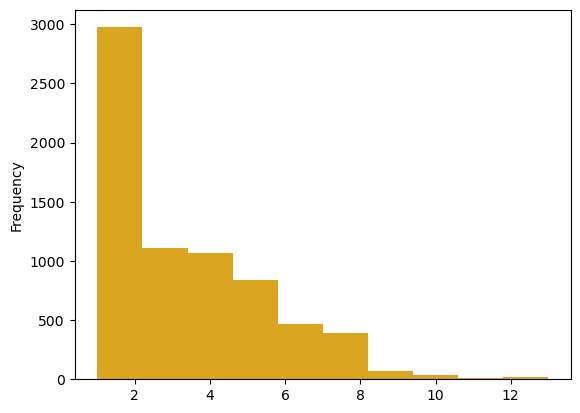

In [10]:
df['roles_counter'] = df['JobRoleInterest_updated'].apply(lambda x: len(x) if x is not None else None)
df['roles_counter'].value_counts(normalize=True, ascending=False).mul(100).round(2)
df['roles_counter'].plot.hist(color="goldenrod")
plt.show()

It is worth noting that the majority of survey respondents cited between one and four job titles of interest. Therefore, it is crucial to identify the job titles that occur most frequently in the dataset to gain a better understanding of the respondents' preferences.

In [11]:
roles_dict = {}

for row in df['JobRoleInterest_updated']:
    if row:
        for role in row:
            if role in roles_dict:
                roles_dict[role] += 1
            else:
                roles_dict[role] = 1
        
coders_jobs = pd.DataFrame.from_dict(roles_dict, orient='index')        
coders_jobs.columns = ['Counter']
coders_jobs.reset_index(level = 0, inplace = True)
coders_jobs = coders_jobs.rename(columns = {'index':'Jobs'})
coders_jobs.sort_values(by="Counter", ascending=False)
coders_jobs['% share'] = round((coders_jobs['Counter']/coders_jobs['Counter'].sum()) * 100, 2)

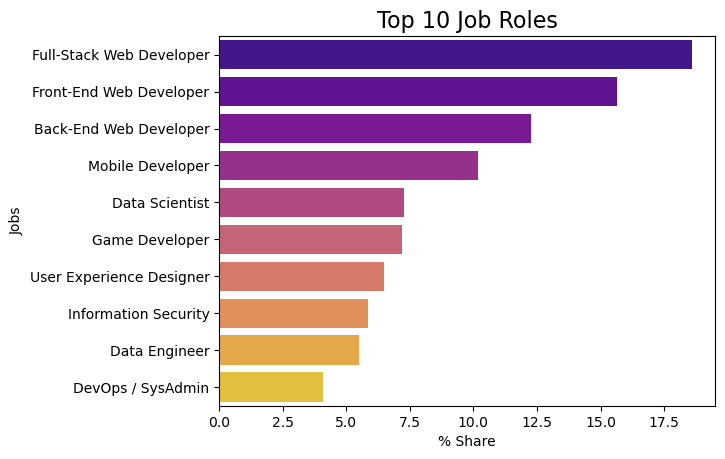

In [12]:
#Top ten job roles bar chart
top_10_jobs = coders_jobs.sort_values('% share', ascending=False, )[:10]
bar_plot = sns.barplot(data=top_10_jobs, x='% share', y="Jobs",palette="plasma", orient="h")
plt.title('Top 10 Job Roles', fontsize=16)
plt.xlabel('% Share')
plt.ylabel('Jobs')
plt.show()

In [13]:
#Drop NA values and check % of each posistion
df['JobRoleInterest_updated'] = df['JobRoleInterest_updated'].fillna(np.nan)
df.dropna(subset=['JobRoleInterest_updated'], inplace=True)

In [14]:
#Filter all rows that are interested in Web or Mobile Development
import re
def check_if_web(row):
    pattern = re.compile(r'[Ww]eb[\s\-][Dd]eveloper|[Mm]obile[\s\-][Dd]eveloper')
    if row is not np.nan:
        web_mob = list(filter(pattern.search, row))
        if len(web_mob):
            return 1
        else:
            return 0
        
web_mobile_interest = df['JobRoleInterest_updated'].apply(check_if_web)
web_mobile_interest

1        1
2        1
3        1
4        1
6        1
        ..
18161    1
18162    0
18163    1
18171    1
18174    1
Name: JobRoleInterest_updated, Length: 6992, dtype: int64

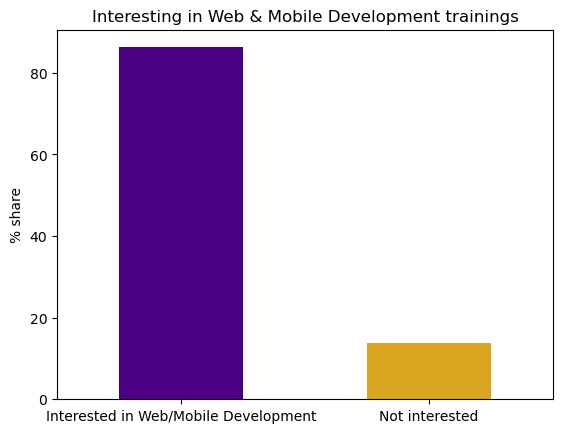

In [15]:
web_mobile_interest_2 = web_mobile_interest.value_counts(normalize=True) * 100
web_mobile_interest_2.plot.bar(color=["indigo", "goldenrod"])
plt.ylabel('% share')
plt.title('Interesting in Web & Mobile Development trainings')
plt.xticks([0,1], ['Interested in Web/Mobile Development', 'Not interested'], rotation=0)

# show the plot
plt.show()

### Location and Densities

Assuming the dataset values are accurate and reliable for analytical purposes, it is possible to gain valuable insights into coder location and potential markets for the company's campaign. The dataset contains two columns related to location, namely 'CountryCitizen' and 'CountryLive', with the latter providing information on the location where coders currently reside. Consequently, this column will be utilized for further analysis to identify the most promising markets. The primary goal is to identify the top markets for investment.

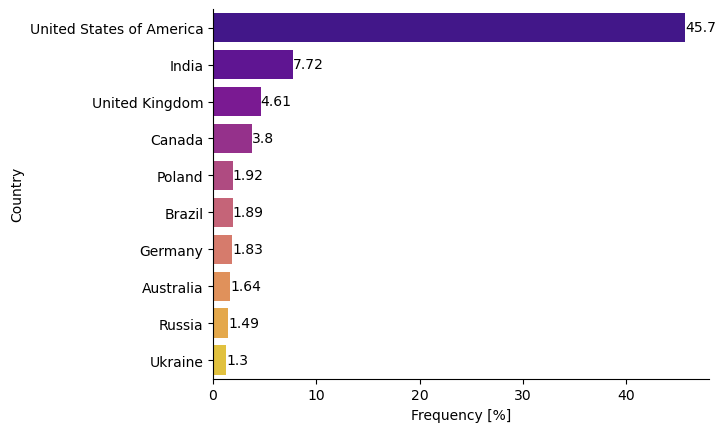

In [16]:
coders_country = df['CountryLive'].value_counts()
coders_country_perc = round(df['CountryLive'].value_counts(normalize=True).mul(100), 2)
df_location = pd.merge(coders_country, coders_country_perc, on=coders_country.index)
df_location.columns = ["Country","Frequency","Frequency [%]"]
barplot_location = sns.barplot(x="Frequency [%]", y="Country", data =df_location.iloc[:10], palette="plasma", orient="h" )
barplot_location.bar_label(barplot_location.containers[0])
sns.despine()
plt.show()



Undoubtedly, the United States represents the largest potential market, with over 45% of the sample population. While India also appears to be a promising market, further analysis is required to assess its true market value. Canada and the United Kingdom will also be taken into consideration, as both countries exhibit similar frequencies within the sample population. Additionally, individuals in Canada and the UK are native English speakers, which is a desirable for the company, as it offers courses in English.

### Spending money

To identify the most promising market for investment, it is essential to ascertain the countries in which coders are most willing to invest in developing their tech skills. One approach to achieving this goal would be to begin by analyzing the "MoneyForLearning" column, which may provide valuable insights into coder spending patterns.


In [17]:
df_spend = df

In [19]:
df_spend['MonthsProgramming'] = df_spend['MonthsProgramming'].replace({0: 1, None: 1})
df_spend['Spending per month'] = df_spend['MoneyForLearning']/df_spend['MonthsProgramming']
df_spend['Spending per month']

1           13.333333
2          200.000000
3            0.000000
4            0.000000
6            0.000000
             ...     
18161        0.000000
18162        0.000000
18163             NaN
18171    10000.000000
18174             NaN
Name: Spending per month, Length: 6992, dtype: float64

In [20]:
#NULL values in Spending per month column
null_values = df_spend['Spending per month'].isnull().sum()
print(f"Total null values for coder monthly spending: {null_values}")

Total null values for coder monthly spending: 675


In [21]:
df_spend.dropna(subset='Spending per month', inplace=True)
df_spend['Spending per month'].isnull().sum()

0

In [22]:
#NULL values in CountryLive column
null_values_2 = df_spend['CountryLive'].isnull().sum()
print(f"Total null values for coder living location: {null_values_2}")


Total null values for coder living location: 105


In [23]:
df_spend.dropna(subset='CountryLive', inplace=True)
df_spend['CountryLive'].isnull().sum()

0

In [24]:
#We are selecting only top 4 biggest markets
top_4 = ['United States of America', 'India', 'Canada', 'United Kingdom']
df_spend_top4 = df_spend[df_spend['CountryLive'].isin(top_4)]
df_spend_top4.groupby('CountryLive')['Spending per month'].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    227.997996
Name: Spending per month, dtype: float64

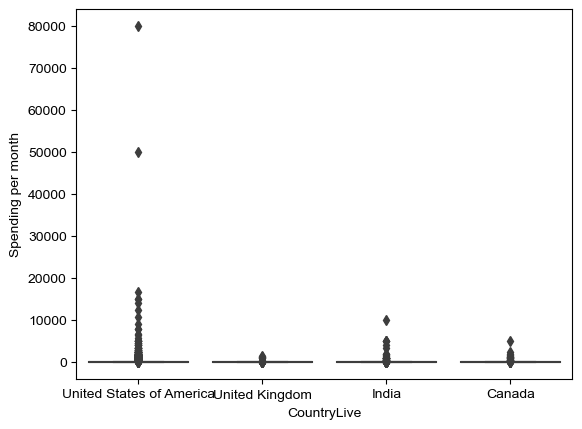

In [25]:
sns.boxplot(df_spend_top4, x='CountryLive', y='Spending per month')
sns.set(rc = {'figure.figsize':(8,5)})

There is a lot of extreme outliers for each country that affects the mean. In order to get a better view we need to remove them from dataset.

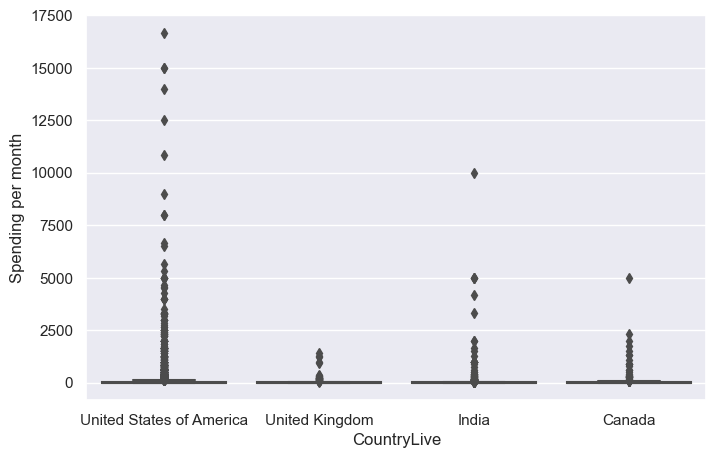

In [26]:
df_spend_top4= df_spend_top4[df_spend_top4['Spending per month'] <20000]
sns.boxplot(df_spend_top4, x='CountryLive', y='Spending per month')
sns.set(rc={'figure.figsize': (8,5)})

In [27]:
df_spend_top4.groupby('CountryLive')['Spending per month'].mean()

CountryLive
Canada                      113.510961
India                       135.100982
United Kingdom               45.534443
United States of America    183.800110
Name: Spending per month, dtype: float64

There are still many outliers value in India and USA. One of the reason why people are willing pay way more than other is fact that they participated in bootcamps which are more expensive option.

In [28]:
india_outliers = df_spend_top4[(df_spend_top4['Spending per month'] > 2500) & (df_spend_top4['CountryLive'] == 'India')]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JobRoleInterest_updated,roles_counter,Spending per month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[User Experience Designer, Mobile Developer, P...",5.0,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,

None of the person from India outliers had previously participated in bootcamp therefore we can eliminate those records.

In [29]:
df_spend_top4 = df_spend_top4.drop(india_outliers.index)

Now let's examine outliers for USA. There were plenty of people who paid significantly more then most of the population.

In [30]:
usa_outliers = df_spend_top4[(df_spend_top4['Spending per month'] > 5000) &
                            (df_spend_top4['CountryLive'] == 'United States of America')]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JobRoleInterest_updated,roles_counter,Spending per month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[User Experience Designer, Full-Stack Web Deve...",5.0,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03

Out of a sample of thirteen individuals, ten reported having programmed for less than three months, with six of them attending a bootcamp. This explains why they paid more for the course. To maintain the representativeness of the data, it may be advisable to exclude records for individuals who did not attend a boot
camp. Alternatively, another option would be to remove records for individuals who studied for less than three months, as they are more likely to have opted for intensive courses or boot camps, and therefore, may not be representative of the broader population.

In [31]:
usa_no_bootcamp = df_spend_top4[(df_spend_top4['Spending per month'] > 5000) &
                            (df_spend_top4['CountryLive'] == 'United States of America') & 
                                       (df_spend_top4['AttendedBootcamp'] == 0.0)]

df_spend_top4 = df_spend_top4.drop(usa_no_bootcamp.index)

usa_below_3_months = df_spend_top4[(df_spend_top4['Spending per month'] > 5000) &
                            (df_spend_top4['CountryLive'] == 'United States of America') & 
                                       (df_spend_top4['MonthsProgramming'] < 3)]

df_spend_top4 = df_spend_top4.drop(usa_below_3_months.index)

Outliers for Canada

In [32]:
canada_outliers = df_spend_top4[(df_spend_top4['Spending per month'] > 4000) &
                            (df_spend_top4['CountryLive'] == 'Canada')]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,JobRoleInterest_updated,roles_counter,Spending per month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,"[Mobile Developer, Full-Stack Web Developer, D...",8.0,5000.0


Both coders were programming less than 3 months. One of them attended bootcamp about the second we don't have much data why the sepnding is so high therefore will remove also these records.

In [33]:
df_spend_top4 = df_spend_top4.drop(canada_outliers.index)

In [34]:
df_spend_top4.groupby('CountryLive')['Spending per month'].mean()

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    144.888094
Name: Spending per month, dtype: float64

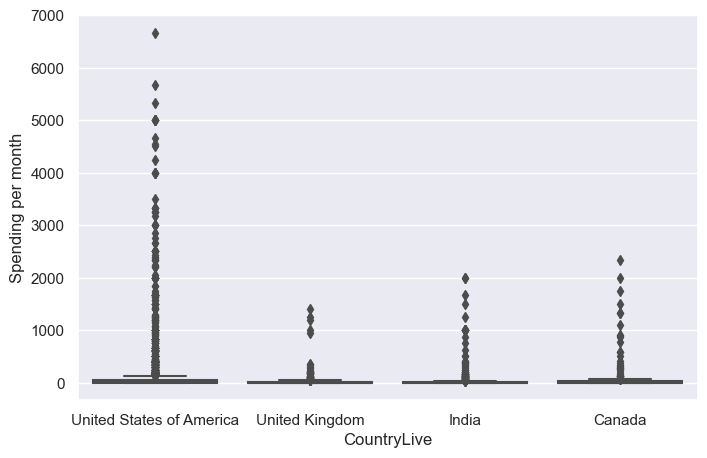

In [35]:
sns.boxplot(df_spend_top4, x='CountryLive', y='Spending per month')
sns.set(rc={'figure.figsize': (8,5)})

## Best markets

The most favorable market for investment appears to be the United States, with a significant number of individuals learning to code, including those with a substantial budget. The secondary market presents a more challenging decision between India and Canada. While India may appear to be a more attractive option due to its large population, Canada boasts a higher GDP per capita, which may suggest that its citizens are willing to invest more in education. To assess the potential of these markets, it would be prudent to calculate the number of individuals willing to pay more than $59 for these products which is price learing courses offered by the company.

In [40]:
df_target_price_range = df_spend_top4[df_spend_top4['Spending per month'] > 59]
df_target_price_range['CountryLive'].value_counts(normalize=True).mul(100)

United States of America    81.195517
India                        8.592777
United Kingdom               5.354919
Canada                       4.856787
Name: CountryLive, dtype: float64

## Final conclusion

As expected, India, with its large population, represents the second-largest market in terms of potential customer volume. However, deciding on a secondary market for investment poses a challenge. 
One option is for the company to initiate its campaign in all three countries, with a primary focus on the US market, which appears to be the most profitable. The performance of Canada and India could then be monitored closely, and further decisions made accordingly. 
Based on the above analysis, we recommend entering solely the US market, as the potential there is significantly greater than in Canada and India combined. 
Alternatively, conducting a comprehensive market analysis of Canada and India could provide valuable insights to facilitate a more informed decision-making process.